### Riferimenti bibliografici:

* Hastie, T.; Tibshirani, R. & Friedman, J. (2009), [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/).

# Componenti e curve principali

## Indice

1. [Analisi delle componenti principali (PCA)](#pca)<br>
    1.1 [Relazione tra PCA e decomposizione a valori singolari (SVD)](#svd)<br>
    1.2 [Studiare l'effetto della centratura di X](#centratura)<br>
2. [Spirale logaritmica](#spirale)<br>
    2.1 [Generare le osservazioni](#generare)<br>
    2.2 [Visualizzare le osservazioni](#visualizzare)<br>
3. [Curve principali](#curve_principali)<br>

In [1]:
import inspect
import math
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

# 1. Analisi delle componenti principali (PCA) <a id=pca> </a>

## 1.1 Relazione tra PCA e decomposizione a valori singolari (SVD) <a id=svd> </a>

In [2]:
np.random.seed(42)

x1 = np.random.uniform(3, 6, size=100)
x2 = 10 - x1 + np.random.normal(scale=0.5, size=100)
X = np.c_[x1, x2]

In [3]:
# concateno i due array x1 e x2 per ottenere una matrice Nxp (100x2)

print("\nPrime 10 righe di X:", X.shape)
print(X[:10])
print("\nForma dell'array:", X.shape)


Prime 10 righe di X: (100, 2)
[[4.12362036 5.91990318]
 [5.85214292 3.99835341]
 [5.19598183 4.84989856]
 [4.79597545 4.21024009]
 [3.46805592 6.42210813]
 [3.46798356 6.71057272]
 [3.17425084 7.56469619]
 [5.59852844 4.14233645]
 [4.80334504 4.79240816]
 [5.12421773 4.62490374]]

Forma dell'array: (100, 2)


$\mathbf{X}$ è una matrice $N\times p$.

$\mathbf{X} = \mathbf{U}\mathbf{D}\mathbf{V}^\top$ è detta *decomposizione a valori singolari* (SVD).

$\mathbf{U}$ è una matrice $N\times p$ ortogonale le cui colonne vengono chiamate *vettori singolari sinistri*.

$\mathbf{V}$ è una matrice $p\times p$ ortogonale le cui colonne vengono chiamate *vettori singolari destri*.

$\mathbf{D}$ è una matrice $p\times p$ diagonale i cui valori vengono chiamati *valori singolari* e corrispondono alla radice quadrata degli autovalori di $\mathbf{X}^\top\mathbf{X}$.

$\mathbf{U}\mathbf{D}$ vengono dette le *componenti principali* di $\mathbf{X}$.

$\mathbf{V}_q$ è la matrice composta dalle prime $q$ colonne di $\mathbf{V}$.

$\mathbf{H}_q = \mathbf{V}_q\mathbf{V}_q^\top$ è una *matrice di proiezione*, mappa ogni riga di $X$ (vista come vettore colonna), $x_i$, nella sua ricostruzione di ordine $q$, $\mathbf{H}_qx_i$ (quindi $\mathbf{X}_q = \mathbf{X}\mathbf{H}_q$).

In [4]:
np.random.seed(42)

# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0) 
# return evenly spaced numbers over a specified interval.
x = np.linspace(3, 6, num=100)

# aggiungo ai valori x e (10-x) un disturbo casuale da una Normale bivariata con matrice di varianza definita come I * 0.1
X = np.c_[x, 10 - x] + np.random.multivariate_normal(np.zeros(2), 0.1 * np.eye(2), size=len(x))
print(X[:10])
print("Forma di X (N X p): {} X {}".format(*X.shape))

[[3.15707481 6.95627699]
 [3.23512013 7.4513213 ]
 [2.98656026 6.86535333]
 [3.59030003 7.15177508]
 [2.97275128 7.05036043]
 [3.00496961 6.70120817]
 [3.25833337 6.21314948]
 [2.6666543  6.61006786]
 [2.92213892 6.85694949]
 [2.98558485 6.28066308]]
Forma di X (N X p): 100 X 2


### Esercizio

1. Ottenere $\mathbf{U}$, $\mathbf{D}$, $\mathbf{V^\top}$ utilizzando la funzione [`numpy.linalg.svd()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) ponendo `full_matrices=False` (nota: la funzione restituisce $\mathbf{U}$, $s$, $\mathbf{V^\top}$, dove $s$ sono gli elementi sulla diagonale di $D$);
2. Verificare che $\mathbf{X} = \mathbf{U}\mathbf{D}\mathbf{V}^\top$ utilizzando la funzione [`numpy.allclose()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html);
3. Verificare che `U.dot(D)`è equivalente a `U * s`;
4. Dire grazie a che proprietà in NumPy è possibile moltiplicare (prodotto di Hadamard) un array $(N, K)$ con un array $(K,)$.
5. Dimostrare che i valori singolari non nulli di $X$ (che si trovano sulla diagonale principale di $D$, sono le radici quadrate degli autovalori non nulli di $X'X$.

In [5]:
# 1.
U, s, Vt = np.linalg.svd(X, full_matrices=False)
D = np.eye(2) * s

print("Forma di U (N X p): {} X {}".format(*U.shape))
print("Forma di D (p X p): {} X {}".format(*D.shape))
print("Forma di V' (p X p): {} X {}".format(*Vt.shape))

Forma di U (N X p): 100 X 2
Forma di D (p X p): 2 X 2
Forma di V' (p X p): 2 X 2


In [6]:
# 2.
# help(np.allclose)
# Help on function allclose in module numpy:
# allclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
#    Returns True if two arrays are element-wise equal within a tolerance.

np.allclose(X, U.dot(D).dot(Vt))

True

In [7]:
help(np.allclose)

Help on function allclose in module numpy:

allclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
    Returns True if two arrays are element-wise equal within a tolerance.
    
    The tolerance values are positive, typically very small numbers.  The
    relative difference (`rtol` * abs(`b`)) and the absolute difference
    `atol` are added together to compare against the absolute difference
    between `a` and `b`.
    
    NaNs are treated as equal if they are in the same place and if
    ``equal_nan=True``.  Infs are treated as equal if they are in the same
    place and of the same sign in both arrays.
    
    Parameters
    ----------
    a, b : array_like
        Input arrays to compare.
    rtol : float
        The relative tolerance parameter (see Notes).
    atol : float
        The absolute tolerance parameter (see Notes).
    equal_nan : bool
        Whether to compare NaN's as equal.  If True, NaN's in `a` will be
        considered equal to NaN's in `b` in the output a

In [8]:
# 3.
# prodotto scalare, viene fatto elemento (nel caso di U array 1-dim) per elemento (per s è uno scalare)
np.allclose(U * s, U.dot(D))

True

In [9]:
# 4.
# Grazie al broadcasting

In [10]:
# 5.
# si veda help(np.linalg.eig)

## 1.2 Studiare l'effetto della centratura di X <a id=centratura> </a>

> Nota: questa parte è ispirata a una [domanda](https://stats.stackexchange.com/questions/22329/how-does-centering-the-data-get-rid-of-the-intercept-in-regression-and-pca/22331#22331) posta su [Cross Validated](https://stats.stackexchange.com/) ([StackExchange](https://stackexchange.com/))

In [11]:
from msbd.grafici import grafico_proiezione_sul_primo_asse_principale

print(inspect.getsource(grafico_proiezione_sul_primo_asse_principale))

def grafico_proiezione_sul_primo_asse_principale(X):
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    V = Vt.T
    V1 = V[:, [0]]
    H1 = V1.dot(V1.T)
    X1 = X.dot(H1)

    x_max, y_max = np.max([-X.min(axis=0), X.max(axis=0)], axis=0) * 1.1
    x = np.linspace(-x_max, x_max)

    plt.title("Proiezione di X sul primo asse principale")
    plt.scatter(X[:, 0], X[:, 1], facecolor="none", edgecolor="tab:blue",
        label="$x_i$")
    plt.scatter(X1[:, 0], X1[:, 1], color="tab:blue",
        label="$\mathbf{H_1}x_i$")
    plt.plot(x, x * V1[1] / V1[0], ls="--", color="tab:orange",
        label="Primo asse principale")
    plt.arrow(0, 0, V1[0, 0], V1[1, 0], head_width=0.2, lw=2, color="tab:orange")
    plt.hlines(0, -x_max, x_max)
    plt.vlines(0, -y_max, y_max)
    plt.xlim([-x_max, x_max])
    plt.ylim([-y_max, y_max])
    plt.legend()



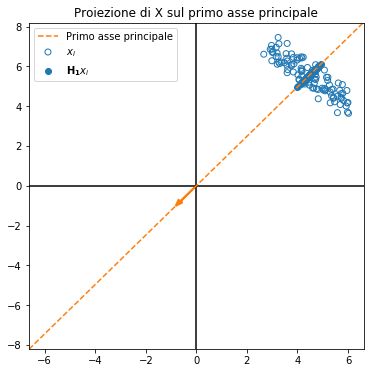

In [12]:
plt.figure(figsize=(6, 6))

grafico_proiezione_sul_primo_asse_principale(X)

plt.show()

### Esercizio

6. Riottenere il grafico sui dati centrati.

# 2. Spirale logaritmica <a id=spirale> </a>

### Rappresentazione parametrica della spirale logaritmica

$
\begin{align}
x(\lambda)&=a{\text{e}}^{b\lambda}\cos(\lambda)\\
y(\lambda)&=a{\text{e}}^{b\lambda}\sin(\lambda)
\end{align}
$

$\\a, b \in \mathbb{R}$


In [13]:
from msbd.datasets import SpiraleLogaritmica

print(inspect.getsource(SpiraleLogaritmica))

class SpiraleLogaritmica:
    """Spirale logaritimica"""

    def __init__(self, a, b):
        self.a = a
        self.b = b

    def f1(self, l):
        return self.a * np.exp(self.b * l) * np.cos(l)

    def f2(self, l):
        return self.a * np.exp(self.b * l) * np.sin(l)

    def f(self, l):
        return np.c_[self.f1(l), self.f2(l)]



## 2.1 Generare le osservazioni <a id=generare> </a>

In [14]:
sl = SpiraleLogaritmica(0.5, 0.5)

l = np.random.uniform(-math.pi/4, math.pi, 100)
l.sort()
X = sl.f(l)
X_oss = X + np.random.multivariate_normal(np.zeros(2), 0.01 * np.eye(2), size=len(X))
X -= X_oss.mean(axis=0)
X_oss -= X_oss.mean(axis=0)

In [15]:
print("Primi 10 valori di X (spirale logaritmica):\n", X[:10])
print("\nPrimi 10 valori di X_oss (osservazioni generate a partire da X):\n", X_oss[:10])

Primi 10 valori di X (spirale logaritmica):
 [[ 0.38261329 -0.85658471]
 [ 0.39816841 -0.85001058]
 [ 0.3998186  -0.84926655]
 [ 0.40549282 -0.84663876]
 [ 0.41323762 -0.84287627]
 [ 0.41523865 -0.84187073]
 [ 0.42004983 -0.8393961 ]
 [ 0.42655859 -0.83591864]
 [ 0.42755207 -0.83537457]
 [ 0.43562208 -0.8308226 ]]

Primi 10 valori di X_oss (osservazioni generate a partire da X):
 [[ 0.36743478 -0.79775299]
 [ 0.42626759 -0.91228053]
 [ 0.37900638 -0.89856664]
 [ 0.34655635 -0.76167855]
 [ 0.44893917 -0.91216723]
 [ 0.50519864 -0.81114078]
 [ 0.50133604 -0.77643322]
 [ 0.34365909 -0.89193674]
 [ 0.50228143 -0.77433754]
 [ 0.43353192 -0.81908986]]


## 2.2 Visualizzare le osservazioni <a id=visualizzare> </a>

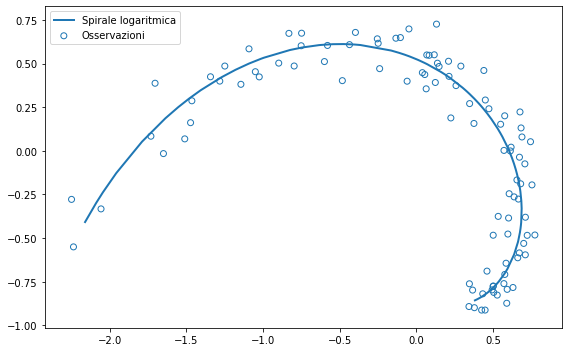

In [16]:
plt.figure(figsize=(8, 5))

plt.plot(X[:, 0], X[:, 1], lw=2, label="Spirale logaritmica")
plt.scatter(X_oss[:, 0], X_oss[:, 1], facecolor="none", edgecolor="tab:blue", label="Osservazioni")
#plt.xlim([-2.5, 1.5])
#plt.ylim([-1.5, 1])
plt.tight_layout()
plt.legend()

plt.show()

# 3. Curve principali <a id=curve_principali> </a>

Passaggi per ottenere la curva principale $f(\lambda)$ (da [The Elements of 
Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) paragrafo 14.5.2):

$f(\lambda) = [f_1(\lambda),\, f_2(\lambda),\, \cdots,\, f_p(\lambda)]$.

$X^\top = [X_1,\, X_2,\, \cdots,\, X_p]$ vettore casuale.

$\hat{\lambda}_f(x)$ definisce il punto sulla curva più vicino a $x$.

$\hat{f}(\lambda)\leftarrow E(X\mid\lambda_f(X) = \lambda)$ è chiamata *curva principale* per la distribuzione del vettore casuale $X$.

Passaggi da alternare fino a convergenza:

1. $\hat{f}_j(\lambda)\leftarrow E(X_j\mid\lambda(X) = \lambda);\; j=1, 2, \cdots,p,$
2. $\hat{\lambda}_f(x)\leftarrow \mathrm{argmin}_{\lambda^\prime}\Vert x - \hat{f}(\lambda^\prime)\Vert$.

In [17]:
from msbd.varieta import CurvaPrincipale

print(inspect.getsource(CurvaPrincipale))

class CurvaPrincipale:
    def _distanza_euclidea(self, l, X):
        X_prz = np.array((self.f1_hat(l), self.f2_hat(l))).T
        return ((X - X_prz) ** 2).sum()

    def partial_fit(self, X):
        if not hasattr(self, "l_hat"):
            U, s, Vt = np.linalg.svd(X, full_matrices=False)
            V = Vt.T
            V1 = V[:, [0]]
            H1 = V1.dot(V1.T)
            def f1_hat(l): return V1[0, 0] * l
            def f2_hat(l): return V1[1, 0] * l

            self.X_prz = X.dot(H1)
            self.l_hat = U[:, 0] * s[0]
            self.f1_hat = f1_hat
            self.f2_hat = f2_hat
        else:
            l_hat_argsort = np.argsort(self.l_hat)
            self.f1_hat = UnivariateSpline(x=self.l_hat[l_hat_argsort],
                y=X[l_hat_argsort, 0])
            self.f2_hat = UnivariateSpline(x=self.l_hat[l_hat_argsort],
                y=X[l_hat_argsort, 1])

            self.l_hat = minimize(lambda l: self._distanza_euclidea(l, X),
                self.l_hat).

In [18]:
from msbd.grafici import grafico_curva_principale

print(inspect.getsource(grafico_curva_principale))

def grafico_curva_principale(X, cp):
    plt.scatter(X[:, 0], X[:, 1], facecolor="none",
        edgecolor="tab:blue", label="Osservazioni")
    plt.plot(cp.f1_hat(np.array(sorted(cp.l_hat))),
        cp.f2_hat(np.array(sorted(cp.l_hat))),
        color="tab:orange", lw=2, label="Curva principale")

    for i in range(len(X)):
        plt.plot([X[i, 0], cp.X_prz[i, 0]], [X[i, 1], cp.X_prz[i, 1]],
            c="tab:gray", ls="--", alpha=0.5)

    plt.scatter(cp.X_prz[:, 0], cp.X_prz[:, 1],
        label="Proiezione delle osservazioni sulla curva principale",
        color="tab:blue")



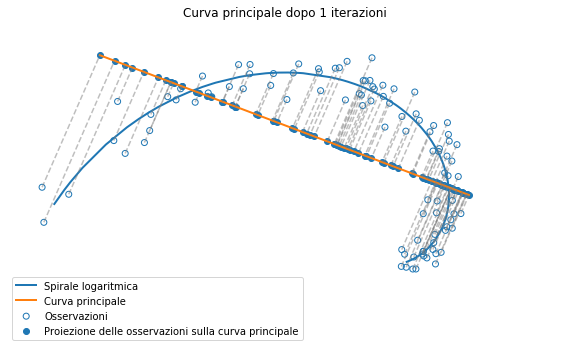

In [ ]:
cp = CurvaPrincipale()
it = 0

while True:
    it += 1

    cp.partial_fit(X_oss)
    
    plt.figure(figsize=(8, 5))
    
    plt.title("Curva principale dopo {} iterazioni".format(it))
    plt.plot(X[:, 0], X[:, 1], lw=2, label="Spirale logaritmica")
    grafico_curva_principale(X_oss, cp)
    plt.xlim([-2.5, 1.5])
    plt.ylim([-1.5, 1])
    plt.axis("off")
    plt.tight_layout()
    plt.legend()

    plt.show()
    
    i = input("Premere invio per continuare, q (quit) per uscire:")

    if i == "q":
        break